In [1]:
qazpip install pytrends matplotlib pandas seaborn plotly


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pytrends.request import TrendReq


# Setup pytrend library and keyword

In [31]:
pytrends = TrendReq(hl = 'en-US', tz = 360)
keyword = "Cloud Computing"

# Data Request

In [32]:
pytrends.build_payload([keyword], cat = 0, timeframe = 'today 12-m',geo='',gprop ='')

# Country wise interest

In [33]:
region_data = pytrends.interest_by_region()
region_data = region_data.sort_values(by = keyword,ascending = False).head(15)

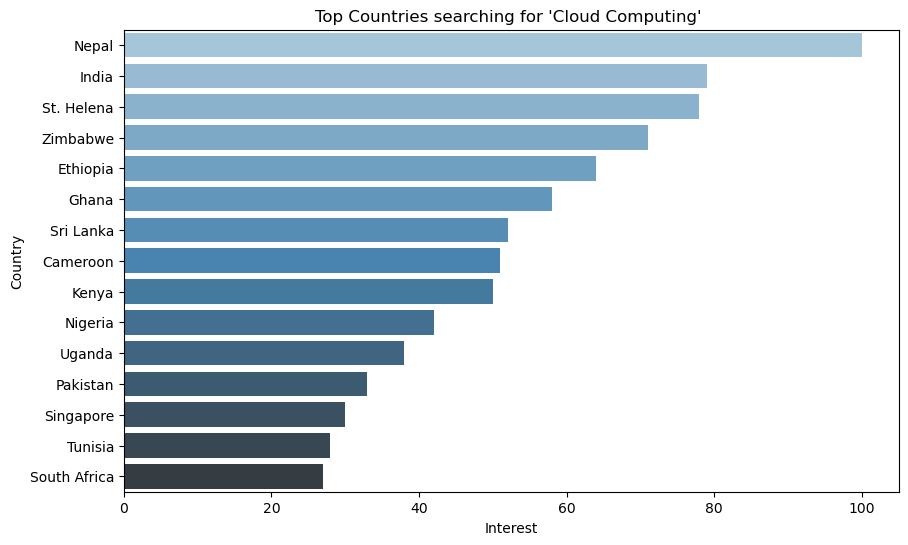

In [34]:
plt.figure(figsize = (10,6))
sns.barplot(x = region_data[keyword],y = region_data.index, palette = "Blues_d")
plt.title(f"Top Countries searching for '{keyword}' ")
plt.xlabel("Interest")
plt.ylabel("Country")
plt.show()

# World map

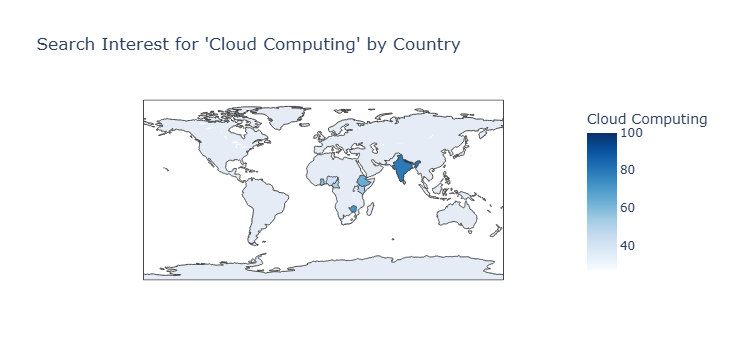

In [46]:
region_data = region_data.reset_index()
fig = px.choropleth(region_data,
                    locations = 'geoName',
                    locationmode = 'country names',
                    color = keyword,
                    title = f"Search Interest for '{keyword}' by Country",
                    color_continuous_scale='Blues')
fig.show()

# time wise interest

In [36]:
time_df = pytrends.interest_over_time()

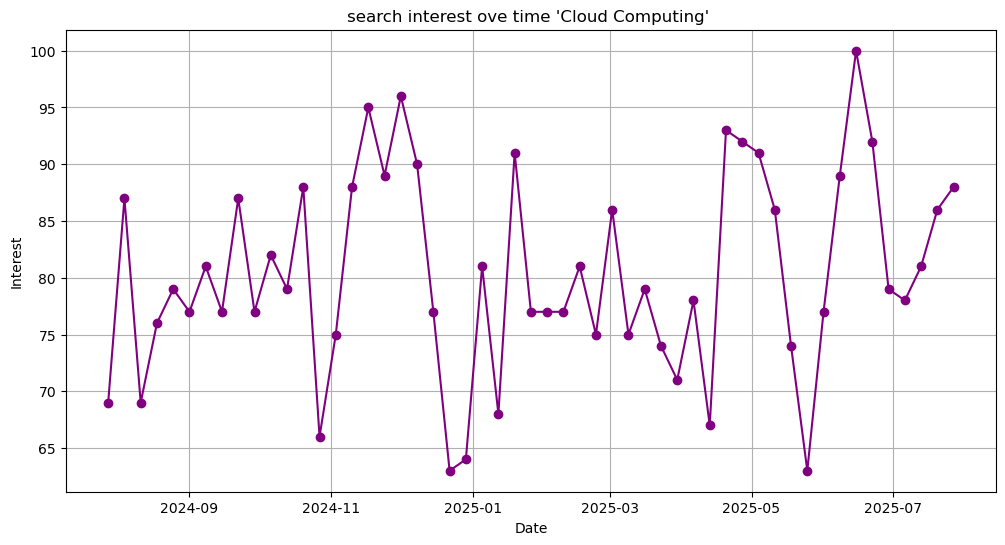

In [37]:
plt.figure(figsize = (12,6))
plt.plot(time_df.index,time_df[keyword],marker = 'o',color = 'purple')
plt.title(f"search interest ove time '{keyword}' ")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.grid(True)
plt.show()

# Multiple Keywords compare

In [43]:
kw_list = ["Cloud Computing","Data Science","machine learning"]
pytrends.build_payload(kw_list, cat= 0, timeframe = 'today 12-m',geo = '',gprop='')

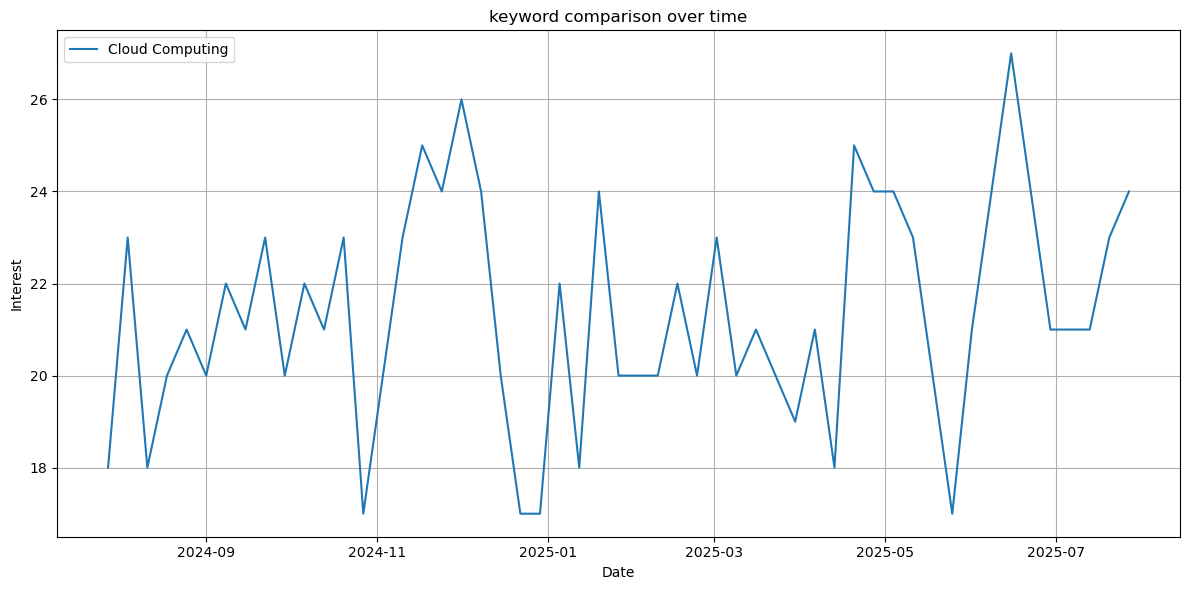

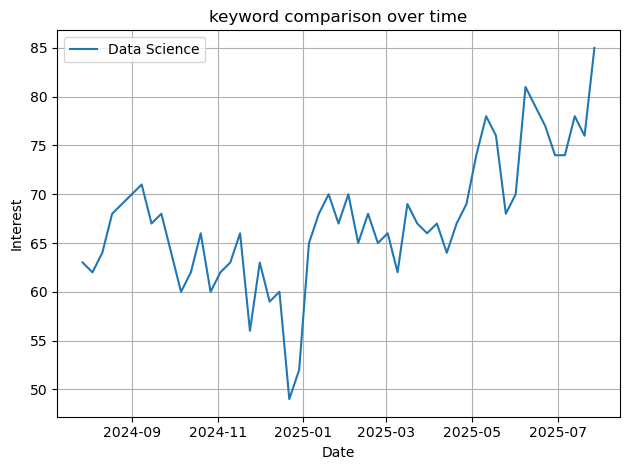

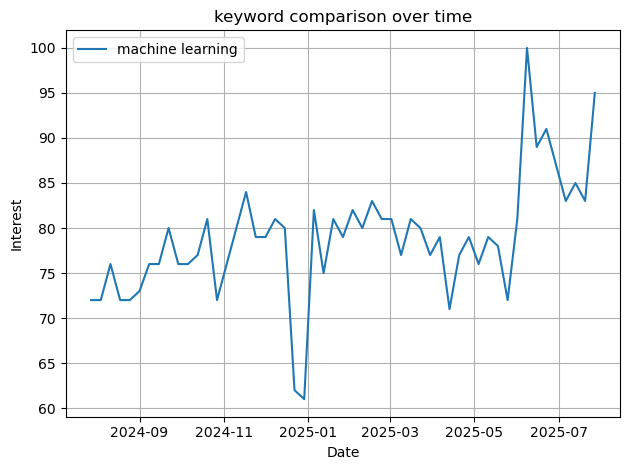

In [44]:
compare_df = pytrends.interest_over_time()

plt.figure(figsize = (12,6))
for kw in kw_list:
    plt.plot(compare_df.index, compare_df[kw], label = kw)
    
    plt.title("keyword comparison over time")
    plt.xlabel("Date")
    plt.ylabel("Interest")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()